导入需要的库，包括 Pandas 用于读取 CSV 文件，Matplotlib 和 Seaborn 用于绘制图形。

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用 Pandas 读取 CSV 文件，并将数据存储在 DataFrame 中。

In [259]:
# df = pd.read_csv('Data_V1.2.csv')

# # Insert a new column for the hard reported ratio
# df['hard_reported_ratio'] = df['Number in hard mode'] / df['Number of  reported results']

调用 DataFrame 的 corr 方法，计算数据之间的相关性系数矩阵。

In [260]:
# corr_matrix = df.corr()

使用 Seaborn 的 heatmap 函数绘制相关度图。你可以设置图形的颜色、标签和标题。

In [261]:
# plt.figure(figsize=(10, 8)) # 设置图形大小
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
# plt.title('Corr') # 添加标题
# plt.show() # 显示图形

只想显示最后一行的热力图，并去掉自身的相关系数，可以在绘制热力图时指定只显示最后一行，并将最后一行的值替换为 NaN。

In [262]:
# # 选取最后一行
# corr_matrix_last = corr_matrix.tail(1)
# # 去掉最后一格，仅保留之前
# corr_matrix_last = corr_matrix.iloc[:, :-1]

# plt.figure(figsize=(16, 1))
# sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
#             fmt='.2f', cbar=False)
# plt.title('corr')
# plt.savefig('corr.png', dpi=1000, bbox_inches='tight')
# plt.show()

In [263]:
# ggplot
# import pyensae
# from pyensae.graphhelper import Corrplot
# plt.figure(figsize=(16, 1))
# c=Corrplot(corr_matrix_last)
# c.plot(mar=c(0, 0, 0, 0))

In [264]:
df = pd.read_csv('Data_V1.4_corr.csv')

# # Find the same letter count in the word column
# df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # Save back to csv
# df.to_csv('Data_V1.4_corr.csv', index=False)

removed_cols = ['Word', 'Date', 'Number of reported results', 'Number in hard mode', '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)', 'eu', 'oe', 'fj']
df = df.drop(removed_cols, axis=1)

In [265]:
def get_corr_with_nn(df):
    import tensorflow as tf
    import numpy as np

    # 使用TensorFlow Keras构建一个简单的神经网络
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # 对每一列使用神经网络进行非线性相关度分析
    nn_mat = np.zeros((len(df.columns), len(df.columns)))
    for i in range(len(df.columns)):
        for j in range(i, len(df.columns)):
            x = df.iloc[:, i].values.reshape(-1, 1)
            y = df.iloc[:, j].values.reshape(-1, 1)
            model.fit(x, y, epochs=10, verbose=0)
            corr = np.corrcoef(y.T, model.predict(x).T)[0, 1]
            nn_mat[i, j] = corr
            nn_mat[j, i] = corr
    return nn_mat

In [266]:
# Get the correlation matrix
# corr_matrix = df.corr()
# # 或者可以使用 pandas 的 corrwith() 函数
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))
# corr_matrix = get_corr_with_nn(df)

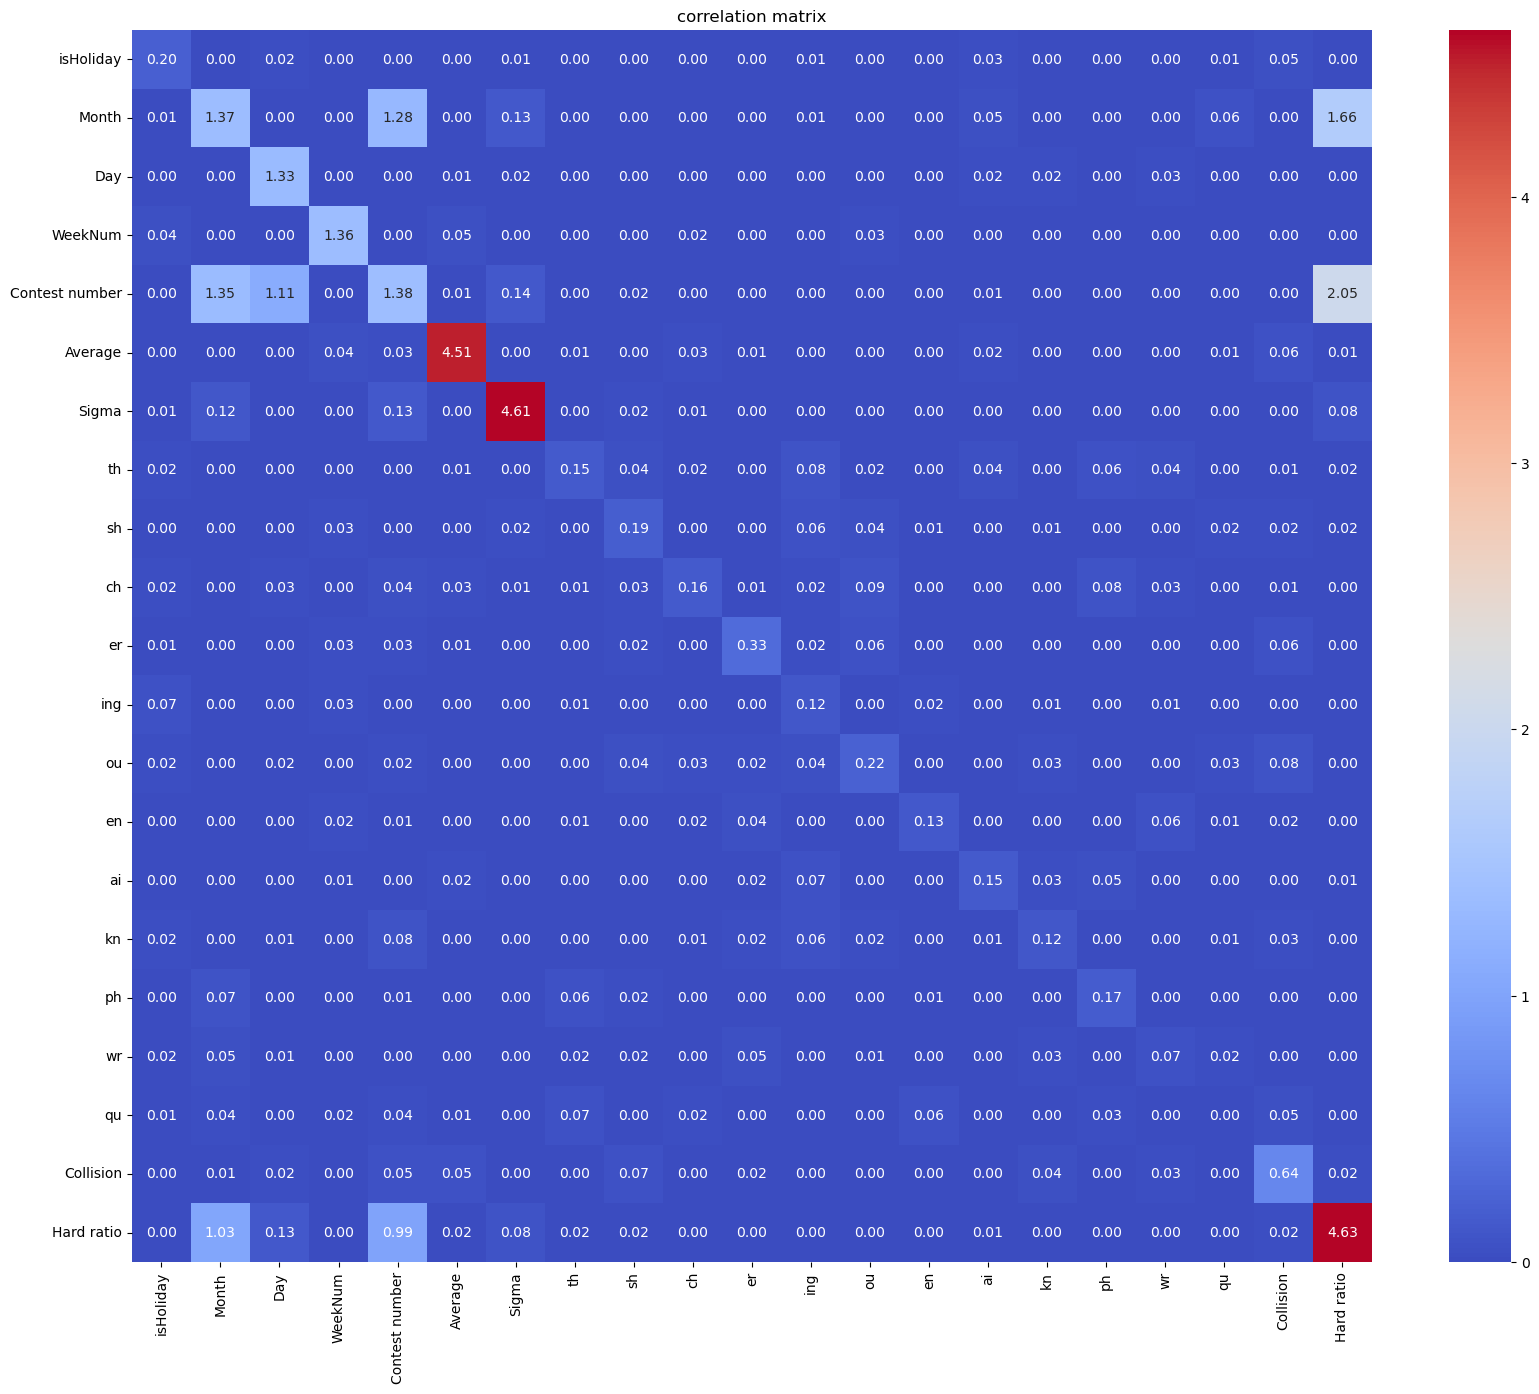

In [267]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

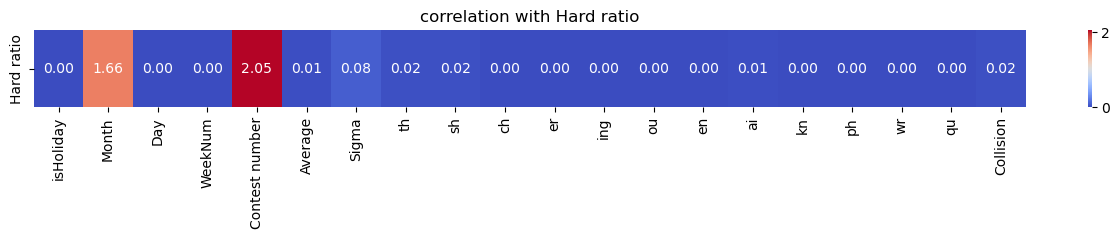

In [268]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['Hard ratio']
corr_matrix_last = corr_matrix_last.drop('Hard ratio')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(16, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with Hard ratio')
# plt.savefig('corraratio.png', dpi=1000, bbox_inches='tight')
plt.show()

In [269]:
df = pd.read_csv('DataWithLabel.csv')

# # Find the same letter count in the word column
# df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # Save back to csv
# df.to_csv('Data_V1.4_corr.csv', index=False)

removed_cols = ['eu', 'oe', 'fj']
input_cols = ['label', 'th','sh','ch','er','ing','ou','en','eu','ai','oe','kn','ph','fj','wr','qu','Collision']
df = df[input_cols]
df = df.drop(removed_cols, axis=1)

In [270]:
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))

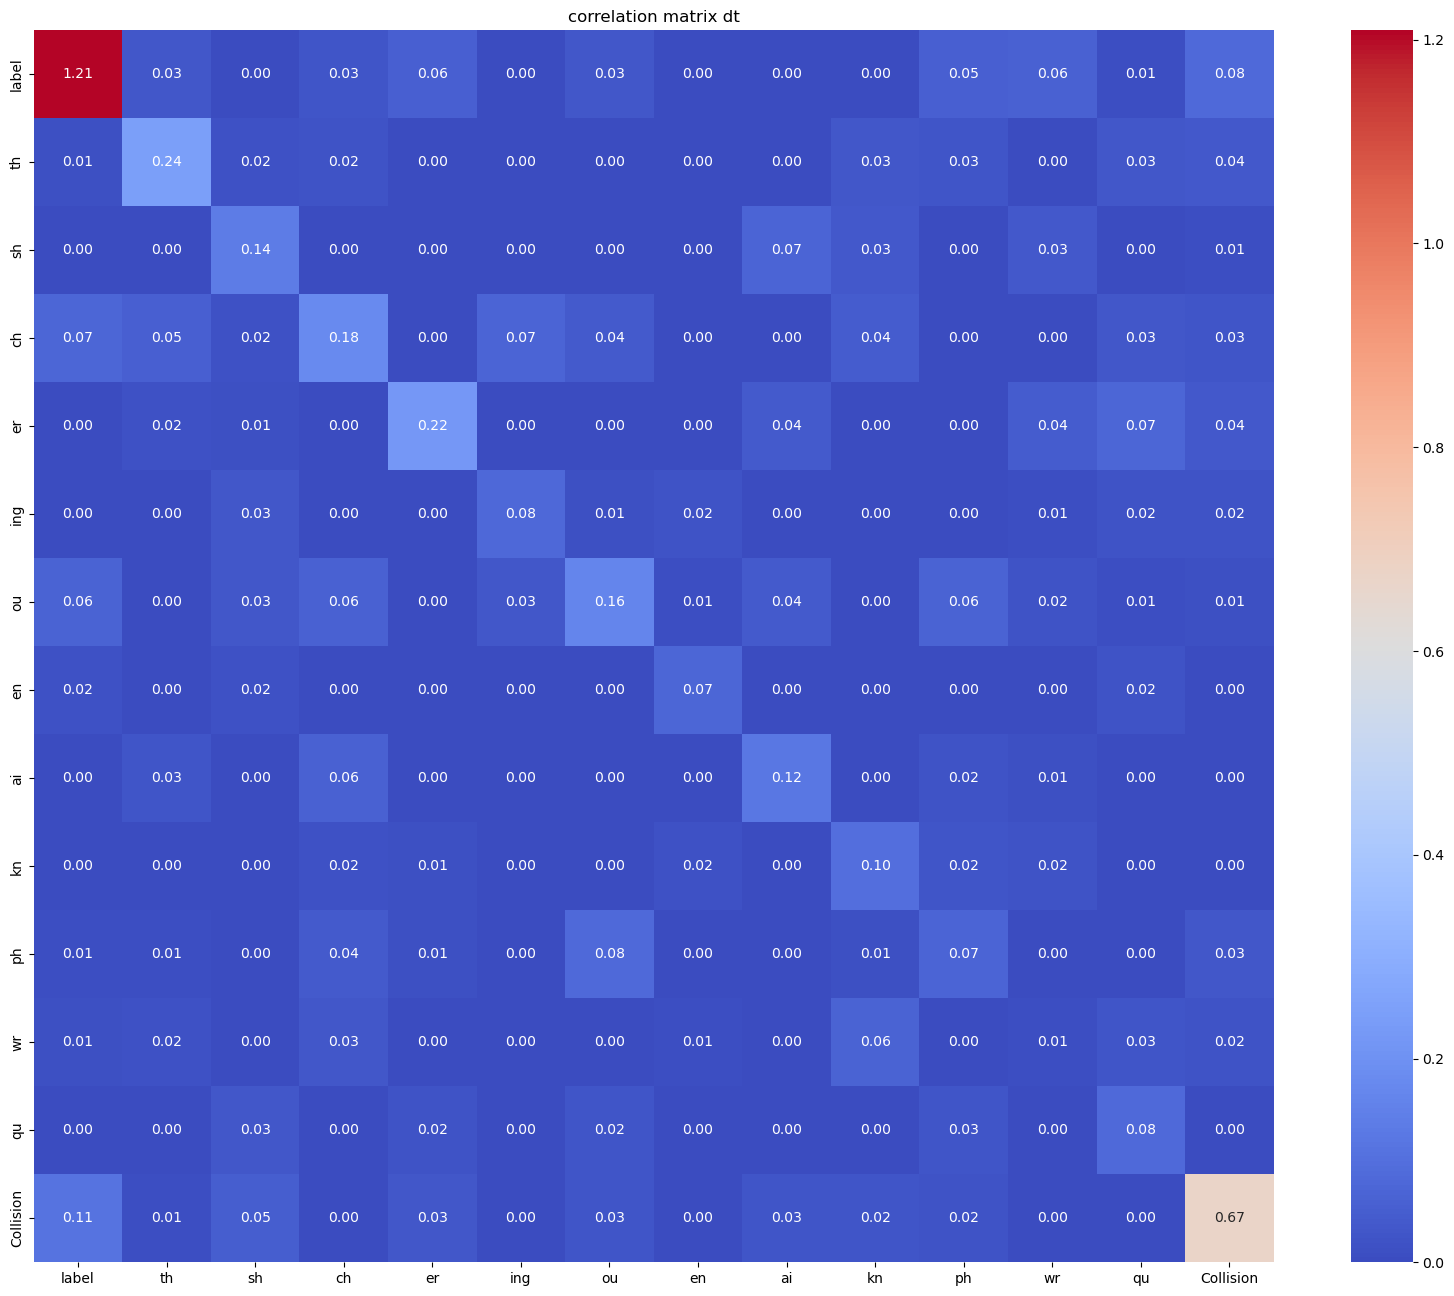

In [271]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix dt') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

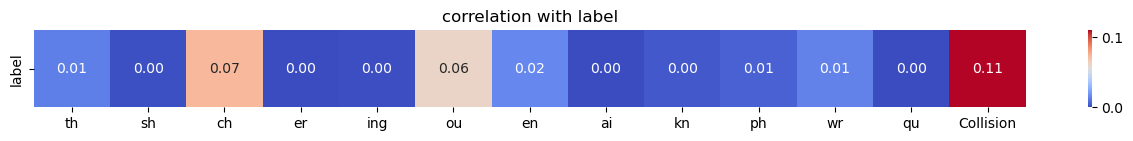

In [272]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['label']
corr_matrix_last = corr_matrix_last.drop('label')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(16, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with label')
plt.savefig('corraratiodt.png', dpi=1000, bbox_inches='tight')
plt.show()